<a href="https://colab.research.google.com/github/bsureshkrishna/qlsc600_2023/blob/main/lec1_linearsystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below, we create some useful functions and code-bits.

Then we generate two sine-waves and look at their magnitude spectra.

peak = 30.0; magnitude = 0.5000000000000001
peak = -30.0; magnitude = 0.5000000000000001
--------------------------------------------------
peak = 30.0; magnitude = 0.5000000000000001
peak = -30.0; magnitude = 0.5000000000000001


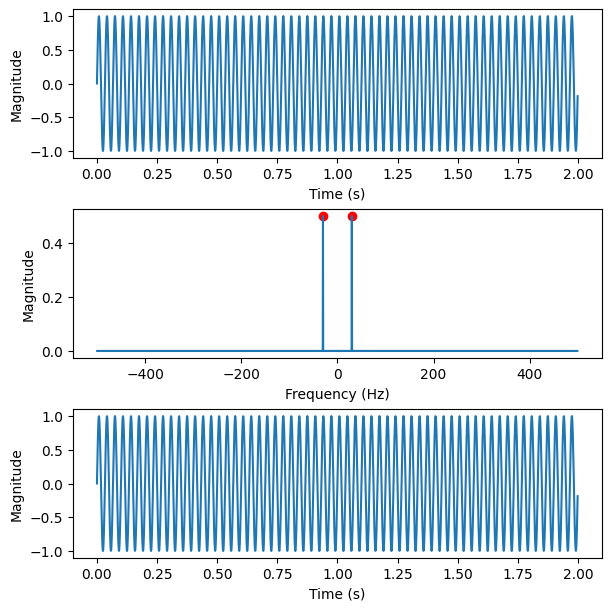

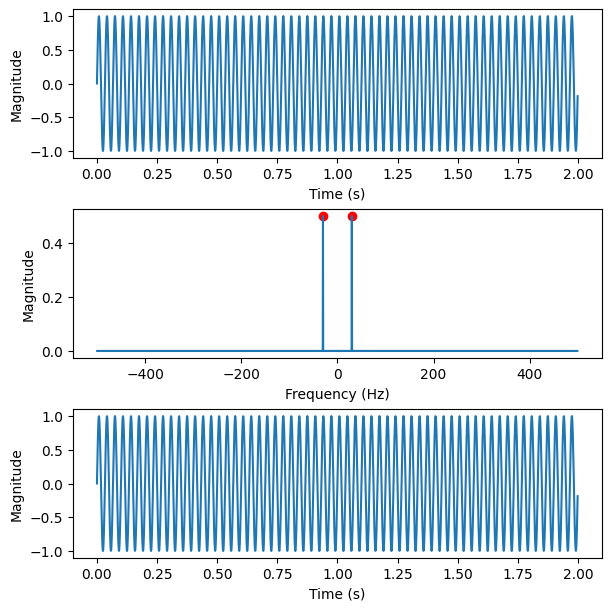

In [ ]:
import matplotlib.pyplot as plt
from scipy import fft
from scipy.signal import find_peaks
import numpy as np

def print_vars(**kwargs):
    output = "; ".join([f"{name} = {value}" for name, value in kwargs.items()])
    print(output)

def myfft(signal1,timeaxis,fs): #function calculates fft and ifft given signal
  signal1_fft=(fft.fft(signal1,norm="forward")) #calculate fft. in general, will be complex
  signal1_ifft=real(fft.ifft(signal1_fft,norm="forward")) #invert the fft to hopefully recreate original signal. not that you cannot ignore phase !
  freqaxis=fft.fftfreq(len(signal1),d=1/fs)
  return signal1_fft, freqaxis, signal1_ifft

def plotmyfft(signal1,timeaxis,fs): #function calculates fft and ifft given signal, and plots them
  signal1_fft=(fft.fft(signal1,norm="forward")) #calculate fft. in general, will be complex
  signal1_ifft=real(fft.ifft(signal1_fft,norm="forward")) #invert the fft to hopefully recreate original signal. not that you cannot ignore phase !
  freqaxis=fft.fftfreq(len(signal1),d=1/fs)
  fig,axs = plt.subplots(3,1,constrained_layout="true")
  ax=axs[0]
  ax.plot(timeaxis,signal1) #make plots
  ax.set_xlabel("Time (s)")
  ax.set_ylabel("Magnitude")
  #plt.title("Signal")
  ax=axs[1]
  fft_abs=abs(signal1_fft)
  ax.plot(freqaxis,fft_abs) #plot fft absolute value = magnitude. ignoring phase here
  peaks, _ = find_peaks(fft_abs, height=0.4) # You might need to adjust the height parameter based on your data
  ax.scatter(freqaxis[peaks], fft_abs[peaks], color='red') # mark peak points

  # Print peaks
  for peak in peaks:
    print_vars(peak=freqaxis[peak],magnitude=fft_abs[peak])

  ax.set_xlabel("Frequency (Hz)")
  ax.set_ylabel("Magnitude")

  ax=axs[2]
  ax.plot(timeaxis,signal1_ifft) #plot recovered time signal
  ax.set_xlabel("Time (s)")
  ax.set_ylabel("Magnitude")

  return signal1_fft

def plotmyfft2(signal1,timeaxis,fs): #function calculates fft and ifft given signal, and plots them
  signal1_fft=(fft.fft(signal1,norm="forward")) #calculate fft. in general, will be complex
  signal1_ifft=real(fft.ifft(signal1_fft,norm="forward")) #invert the fft to hopefully recreate original signal. not that you cannot ignore phase !
  freqaxis=fft.fftfreq(len(signal1),d=1/fs)
  fig,axs = plt.subplots(1,2,constrained_layout="true")
  ax=axs[0]
  ax.plot(timeaxis,signal1) #make plots
  ax.set_xlabel("Time (s)")
  ax.set_ylabel("Magnitude")
  ax=axs[1]
  fft_abs=abs(signal1_fft)
  ax.plot(freqaxis,fft_abs) #plot fft absolute value = magnitude. ignoring phase here
  ax.set_xlabel("Frequency (Hz)")
  ax.set_ylabel("Magnitude")



fs=1000.0 #sampling frequency
timeaxis=np.arange(0,2.0,step=1/fs)

freq1=30 #sine-wave frequency
amp1=1 #amplitude
signal1=amp1*np.sin(2.0*pi*freq1*timeaxis) #create sine wave
signal1_fft=plotmyfft(signal1,timeaxis,fs)
vals1=signal.find_peaks(abs(signal1_fft),0.04)
print('--------------------------------------------------')
#change sine-wave frequency and amplitude. identify and interpret effects on plot

freq2=10 #sine-wave frequency
amp2=10 #amplitude
signal2=amp1*np.sin(2.0*pi*freq1*timeaxis) #create sine wave
signal2_fft=plotmyfft(signal2,timeaxis,fs)

Now using the code above as a template - experiment with the frequency content of signals. For example:

1. What happened to the Fourier transform (FT) when the amplitude and frequency of the sine-wave were changed ? Why ?
2. Try other values for frequency and amplitude and confirm.
3. Try adding a phase to the sine-wave. What happens to the plotted FT ?
4. Add two sine-waves - what happens to the frequency spectrum ? Change the amplitude of each sine-wave and comment on what happens
5. Go back to a single sine-wave. Rectify it - this is a non-linear operation (why ?). What happens to the frequency spectrum ?

Now take a look at a couple of new signals and their Fourier transforms.

Signal 1 - acts as a low-pass filter. What does this mean ? And why ? Explain in the time and frequency domains.

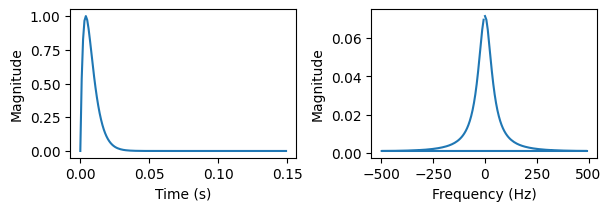

In [ ]:
plt.rcParams['figure.figsize'] = [6, 2]
timeaxis2=np.arange(0,0.15,step=1/fs)# Time values from 0 to 500 milliseconds
alpha = 5
beta = 250
y = (1 - np.exp(-alpha * timeaxis2)) * np.exp(-beta * (timeaxis2 - 0.1))
y=y/max(y)
_=plotmyfft2(y,timeaxis2,fs)
plt.rcParams['figure.figsize'] = [6, 6]

Let us generate a sine-wave. Filter it by y, either by convolution in the time-domain or multiplication in the frequency domain (followed by an ifft). Do they give the same response ? Look carefully at the end of the output.. why does the output extend beyond 2 s ?

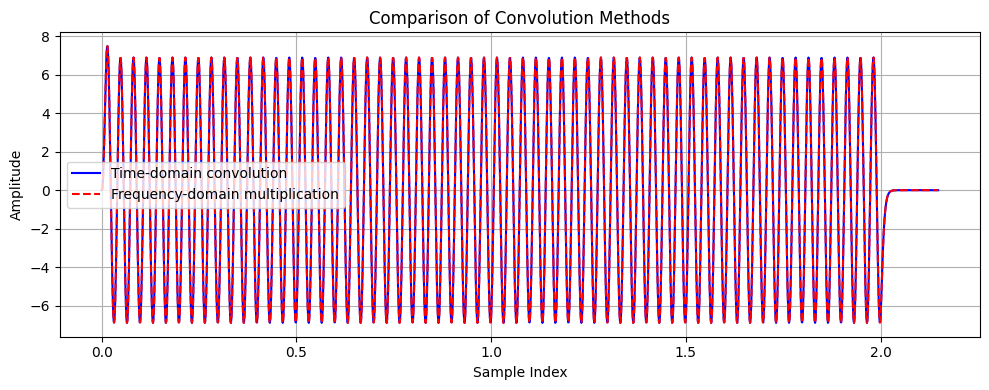

In [ ]:
freq1=30 #sine-wave frequency
amp1=1 #amplitude
signal1=amp1*np.sin(2.0*pi*freq1*timeaxis) #create sine wave
signal1_fft,freqaxis_new,_=myfft(signal1,timeaxis,fs)

# Time-domain convolution
result_time_domain = np.convolve(signal1, y, mode='full')

# Frequency-domain multiplication
N = len(signal1) + len(y) - 1  # this is the size after convolution
X = fft.fft(signal1, n=N)
Y = fft.fft(y, n=N)
result_frequency_domain = real(fft.ifft(X * Y)) #you could check that the imaginary parts are just very small numerical errors

# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot((1/fs)*arange(0,len(result_time_domain)),result_time_domain, label='Time-domain convolution', color='blue')
plt.plot((1/fs)*arange(0,len(result_frequency_domain)),result_frequency_domain, label='Frequency-domain multiplication', color='red', linestyle='--')
plt.title("Comparison of Convolution Methods")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# To ensure that both methods produce nearly the same result
# (There can be very tiny differences due to numerical precision)
assert np.allclose(result_time_domain, result_frequency_domain, atol=1e-5), "The results are not the same!"


Now let us test that low-pass filter claim a bit. First generate a sine-wave with different frequencies: 30 Hz and 200 Hz. Filter it by y. Before running the code, what do you expect ? Is the prediction easier from the time-domain or from the frequency domain ?

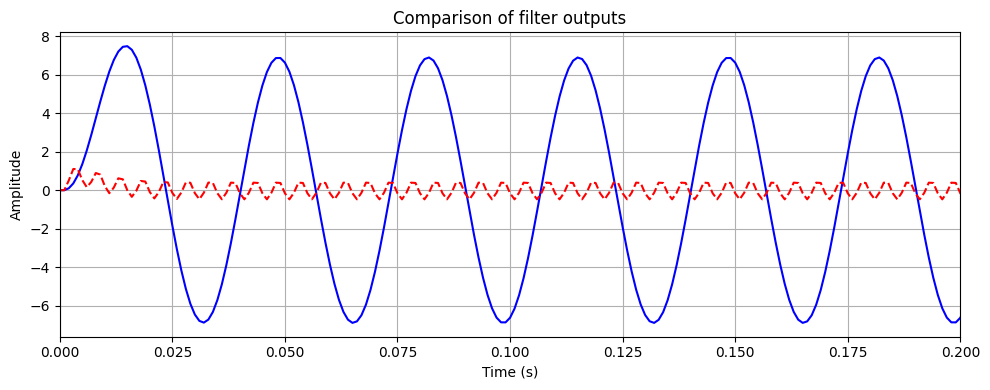

In [ ]:
freq1=30 #sine-wave frequency
amp1=1 #amplitude
signal1=amp1*np.sin(2.0*pi*freq1*timeaxis) #create sine wave
output1 = np.convolve(signal1, y, mode='full')

freq2=200 #sine-wave frequency
amp2=1 #amplitude
signal2=amp2*np.sin(2.0*pi*freq2*timeaxis) #create sine wave
output2 = np.convolve(signal2, y, mode='full')

plt.figure(figsize=(10, 4))
plt.plot((1/fs)*arange(0,len(output1)),output1, label=str(freq1)+" Hz", color='blue')
plt.plot((1/fs)*arange(0,len(output2)),output2, label=str(freq2) + "Hz", color='red', linestyle='--')
plt.title("Comparison of filter outputs")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim([0,0.2])
plt.tight_layout()
plt.show()

Now do the same thing as above, but with some other sine-wave frequencies. Stay well below 500 Hz, to avoid aliasing. If you want to use higher frequencies, what needs to change ?

Then try a sum of two sinusoids, like 30 Hz and 200 Hz. What does the output look like ? Why ? Plot both the output signal and its Fourier transform (using the code towards the top of this notebook). Interpret it.

In [ ]:
#insert code here to test other frequencies and the sum of two sinusoids.

Finally, let us try a different filter. Try to predict its effect on the same sinusoids at 30 Hz and 200 Hz, and the sum of the two.

More challenging: why does this filter, from its time-domain properties (and definition in code) have a spectrum that looks as it does ? Can you intuitively understand this ?

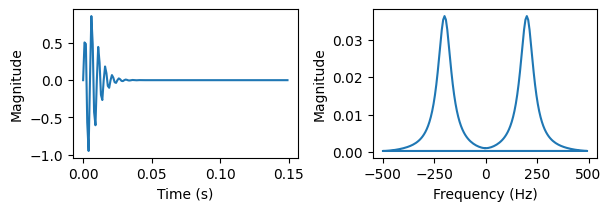

In [ ]:
plt.rcParams['figure.figsize'] = [6, 2]
center_freq=200
y2=y*np.sin(2.0*pi*center_freq*timeaxis2) #create sine wave, multiplied by the previous filter y
_=plotmyfft2(y2,timeaxis2,fs)

Now let us check the prediction for the 30 Hz and 200 Hz sinusoids and their sum. Write your code, based on the template above for the low-pass filter. Interpret the results.

In [ ]:
#Insert code here to do the above